<span style="color:blue">
    
# konlpy 형태소 분석기 불러오기
    
</span>

In [2]:
!pip show wordcloud
#!pip install pakage

Name: wordcloud
Version: 1.8.1
Summary: A little word cloud generator
Home-page: https://github.com/amueller/word_cloud
Author: Andreas Mueller
Author-email: t3kcit+wordcloud@gmail.com
License: MIT
Location: c:\users\asus\anaconda3\lib\site-packages
Requires: pillow, matplotlib, numpy
Required-by: 


In [1]:

# 필요한 패키지 불러오기

import warnings
warnings.filterwarnings('ignore')


from konlpy.tag import Kkma
from konlpy.tag import Komoran
from konlpy.tag import Hannanum
from konlpy.tag import Okt


## 형태소 마다 제공하는 메소드에 차이가 있음

- tagset, morphs, pos, nouns 메소드는 공통으로 제공 

참조 사이트: https://konlpy.org/ko/v0.4.3/api/konlpy.tag/


In [2]:
# 각 형태소 분석기의 object instance 만들기

kkma = Kkma() 

komoran = Komoran() 

hannanum = Hannanum() 

okt = Okt() 


In [3]:
# 각 분석기의 tag set을 확인

print("꼬꼬마 : %s\n" % kkma.tagset)
print("코모란 : %s\n" % komoran.tagset)
print("한나눔 : %s\n" % hannanum.tagset)
print("Okt : %s\n" % okt.tagset)

#꼬꼬마가 테그셋이 풍부하다: 디테일하게 형태소를 분석해준다.

꼬꼬마 : {'EC': '연결 어미', 'ECD': '의존적 연결 어미', 'ECE': '대등 연결 어미', 'ECS': '보조적 연결 어미', 'EF': '종결 어미', 'EFA': '청유형 종결 어미', 'EFI': '감탄형 종결 어미', 'EFN': '평서형 종결 어미', 'EFO': '명령형 종결 어미', 'EFQ': '의문형 종결 어미', 'EFR': '존칭형 종결 어미', 'EP': '선어말 어미', 'EPH': '존칭 선어말 어미', 'EPP': '공손 선어말 어미', 'EPT': '시제 선어말 어미', 'ET': '전성 어미', 'ETD': '관형형 전성 어미', 'ETN': '명사형 전성 어미', 'IC': '감탄사', 'JC': '접속 조사', 'JK': '조사', 'JKC': '보격 조사', 'JKG': '관형격 조사', 'JKI': '호격 조사', 'JKM': '부사격 조사', 'JKO': '목적격 조사', 'JKQ': '인용격 조사', 'JKS': '주격 조사', 'JX': '보조사', 'MA': '부사', 'MAC': '접속 부사', 'MAG': '일반 부사', 'MD': '관형사', 'MDN': '수 관형사', 'MDT': '일반 관형사', 'NN': '명사', 'NNB': '일반 의존 명사', 'NNG': '보통명사', 'NNM': '단위 의존 명사', 'NNP': '고유명사', 'NP': '대명사', 'NR': '수사', 'OH': '한자', 'OL': '외국어', 'ON': '숫자', 'SE': '줄임표', 'SF': '마침표, 물음표, 느낌표', 'SO': '붙임표(물결,숨김,빠짐)', 'SP': '쉼표,가운뎃점,콜론,빗금', 'SS': '따옴표,괄호표,줄표', 'SW': '기타기호 (논리수학기호,화폐기호)', 'UN': '명사추정범주', 'VA': '형용사', 'VC': '지정사', 'VCN': "부정 지정사, 형용사 '아니다'", 'VCP': "긍정 지정사, 서술격 조사 '이다'", 'VV': '동사', 'VX': '보조 

## 형태소 분석 성능 비교

In [4]:
# (경우 1) 띄어쓰기가 올바르지 않은 문장

text = "아버지가방에들어가신다"

# 각 분석기의 형태소 분석 차이 확인 

print("꼬꼬마 : %s\n" % kkma.morphs(text))
print("코모란 : %s\n" % komoran.morphs(text))
print("한나눔 : %s\n" % hannanum.morphs(text))
print("Okt : %s\n" % okt.morphs(text))

#한나눔은 '아버지가방에들어가'를 한 명사로 분석한듯

꼬꼬마 : ['아버지', '가방', '에', '들어가', '시', 'ㄴ다']

코모란 : ['아버지', '가방', '에', '들어가', '시', 'ㄴ다']

한나눔 : ['아버지가방에들어가', '이', '시ㄴ다']

Okt : ['아버지', '가방', '에', '들어가신다']



In [5]:
# 각 분석기의 품사 태깅 차이 확인 

print("꼬꼬마 : %s\n" % kkma.pos(text))
print("코모란 : %s\n" % komoran.pos(text))
print("한나눔 : %s\n" % hannanum.pos(text))
print("Okt : %s\n" % okt.pos(text))



꼬꼬마 : [('아버지', 'NNG'), ('가방', 'NNG'), ('에', 'JKM'), ('들어가', 'VV'), ('시', 'EPH'), ('ㄴ다', 'EFN')]

코모란 : [('아버지', 'NNG'), ('가방', 'NNP'), ('에', 'JKB'), ('들어가', 'VV'), ('시', 'EP'), ('ㄴ다', 'EC')]

한나눔 : [('아버지가방에들어가', 'N'), ('이', 'J'), ('시ㄴ다', 'E')]

Okt : [('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb')]



In [6]:
# (경우 2) 오타가 있는 문장

text2 = "안녕ㅎㅏㅅㅔ여 ㅈㅓ는 ㄷㅐ학생 입니다. "

print("꼬꼬마 : %s\n" % kkma.pos(text2))
print("코모란 : %s\n" % komoran.pos(text2))
print("한나눔 : %s\n" % hannanum.pos(text2))
print("Okt : %s\n" % okt.pos(text2))


꼬꼬마 : [('안녕ㅎㅏㅅㅔ', 'UN'), ('여', 'JKI'), ('ㅈㅓ', 'UN'), ('는', 'JX'), ('ㄷ', 'NNG'), ('ㅐ', 'UN'), ('학생', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EFN'), ('.', 'SF')]

코모란 : [('안녕', 'NNP'), ('하', 'NNP'), ('세', 'NNB'), ('이', 'VCP'), ('어', 'EC'), ('저', 'NP'), ('는', 'JX'), ('대학생', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EF'), ('.', 'SF')]

한나눔 : [('안녕ㅎㅏㅅㅔ', 'N'), ('이', 'J'), ('어', 'E'), ('ㅈㅓ', 'N'), ('는', 'J'), ('ㄷㅐ학생', 'N'), ('일', 'P'), ('ㅂ니다', 'E'), ('.', 'S')]

Okt : [('안녕', 'Noun'), ('ㅎㅏㅅㅔ', 'KoreanParticle'), ('여', 'Noun'), ('ㅈㅓ', 'KoreanParticle'), ('는', 'Verb'), ('ㄷㅐ', 'KoreanParticle'), ('학생', 'Noun'), ('입니다', 'Adjective'), ('.', 'Punctuation')]



In [7]:
# (경우 3) 블로그 문장 분석 비교 


text3 ='도움이 되셨다면 공감을 꾸욱 눌러 주세요~~. 네이버 블로그 ^^; 많이 놀러 와 주세용 ㅋㅋㅋ'

print("꼬꼬마 : %s\n" % kkma.pos(text3))
print("코모란 : %s\n" % komoran.pos(text3))
print("한나눔 : %s\n" % hannanum.pos(text3))
print("Okt : %s\n" % okt.pos(text3))


꼬꼬마 : [('도움', 'NNG'), ('이', 'JKC'), ('되', 'VV'), ('시', 'EPH'), ('었', 'EPT'), ('다면', 'ECE'), ('공감', 'NNG'), ('을', 'JKO'), ('꾸욱', 'UN'), ('눌르', 'VV'), ('어', 'ECS'), ('주세', 'NNG'), ('요', 'JX'), ('~~', 'SW'), ('.', 'SF'), ('네이버', 'NNP'), ('블', 'VV'), ('ㄹ', 'ETD'), ('로그', 'NNG'), ('^^;', 'EMO'), ('많이', 'MAG'), ('놀', 'VV'), ('러', 'ECD'), ('오', 'VV'), ('아', 'ECS'), ('주세', 'NNG'), ('용', 'XSN'), ('ㅋㅋㅋ', 'EMO')]

코모란 : [('도움', 'NNG'), ('이', 'JKS'), ('되', 'VV'), ('시', 'EP'), ('었', 'EP'), ('다면', 'EC'), ('공감', 'NNG'), ('을', 'JKO'), ('꾸욱', 'NA'), ('누르', 'VV'), ('어', 'EC'), ('주', 'VX'), ('시', 'EP'), ('어요', 'EC'), ('~', 'SO'), ('~', 'SO'), ('.', 'SF'), ('네이버', 'NNP'), ('블로그', 'NNP'), ('^', 'SW'), ('^', 'SW'), (';', 'SP'), ('많이', 'MAG'), ('놀', 'VV'), ('러', 'EC'), ('오', 'VV'), ('아', 'EC'), ('주세', 'NNG'), ('용', 'XSN'), ('ㅋㅋㅋ', 'NA')]

한나눔 : [('도움', 'N'), ('이', 'J'), ('되', 'P'), ('셨다면', 'E'), ('공감', 'N'), ('을', 'J'), ('꾸욱', 'N'), ('누르', 'P'), ('어', 'E'), ('주', 'P'), ('세', 'E'), ('요', 'J'), ('~~', 'S'), ('

## KoNLPy에서는 대한민국 헌법 말뭉치인 'kolaw'와 국회법안 말뭉치인 'kobill'을 제공하고 있음


In [8]:
# 헌법 말뭉치 가져오기 

from konlpy.corpus import kolaw
#konlpy.corpus(엄마, 대장) 클래스에서(corpus가 가지임) kolaw를 불러옴

kolaw.fileids()


['constitution.txt']

In [9]:
# 헌법 file 읽어 오기 


cons = kolaw.open('constitution.txt').read()

print(cons[:500])


대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.

       제1장 총강
  제1조 ① 대한민국은 민주공화국이다.
②대한민국의 주권은 국민에게 있고, 


In [10]:
# 국회법안 말뭉치 가져오기 

from konlpy.corpus import kobill

kobill.fileids()


['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [11]:
# 국회법안 file 읽어 오기 

kob = kobill.open('1809890.txt').read()

print(kob[:300])


지방공무원법 일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호

9890

발의연월일 : 2010.  11.  12.  

발  의  자 : 정의화․이명수․김을동 

이사철․여상규․안규백

황영철․박영아․김정훈

김학송 의원(10인)

제안이유 및 주요내용

  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요

한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 

수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 

자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야


In [12]:
# sentences method 는 kkma 만 제공 

print(kkma.sentences(cons[:1000]))


['대한민국 헌법 유구한 역사와 전통에 빛나는 우리 대한 국민은 3·1 운동으로 건립된 대한민국 임시정부의 법통과 불의에 항거한 4·19 민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의· 인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유 민주적 기본질서를 더욱 확고히 하여 정치· 경제· 사회· 문화의 모든 영역에 있어서 각인의 기회를 균등 히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류 공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.', '제 1장 총 강 제 1조 ① 대한민국은 민주 공화국이다.', '② 대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.', '제 2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.', '② 국가는 법률이 정하는 바에 의하여 재외 국민을 보호할 의무를 진다.', '제 3조 대한민국의 영토는 한반도와 그 부속도 서로 한다.', '제 4조 대한민국은 통일을 지향하며, 자유 민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다.', '제 5조 ① 대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다.', '② 국 군은 국가의 안전보장과 국토 방위의 신성한 의무를 수행함을 사명으로 하며, 그 정치적 중립성은 준수된다.', '제 6조 ① 헌법에 의하여 체결· 공포된 조약과 일반적으로 승인된 국제 법규는 국내 법과 같은 효력을 가진다.', '② 외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다.', '제 7조 ① 공무원은 국민 전체에 대한 봉사자이며, 국민에 대하여 책임을 진다.', '② 공무원의 신분과 정치적 중립

In [13]:
# phrases method 는 okt 만 제공 

print(okt.phrases(cons[:200]))


['대한민국헌법', '유구', '역사', '역사와 전통', '우리', '우리 대한국민', '1운동', '건립', '건립된 대한민국임시정부', '건립된 대한민국임시정부의 법통과', '건립된 대한민국임시정부의 법통과 불의', '항거', '19민주이념', '계승', '조국', '조국의 민주개혁', '조국의 민주개혁과 평화적 통일', '조국의 민주개혁과 평화적 통일의 사명', '입각하', '정의', '인도', '인도와 동포애로써', '인도와 동포애로써 민족', '인도와 동포애로써 민족의 단결', '공고', '모든', '모든 사회적 폐습', '모든 사회적 폐습과 불의', '타파', '자율', '자율과 조화', '바탕', '자유민주적 기본질서', '더욱', '정치', '경제', '대한민국', '헌법', '전통', '대한국민', '운동', '임시정부', '통과', '불의', '19', '민주', '이념', '개혁', '통일', '사명', '각하', '동포', '로써', '민족', '단결', '폐습', '조화', '기본질서']


In [14]:
# nouns 메서드: 명사만 추출
# 4개 형태소 분석기에서 공통으로 제공 

print("꼬꼬마 : %s\n" % kkma.nouns(cons[:100]))
print("코모란 : %s\n" % komoran.nouns(cons[:100]))
print("한나눔 : %s\n" % hannanum.nouns(cons[:100]))
print("Okt : %s\n" % okt.nouns(cons[:100]))


꼬꼬마 : ['대한', '대한민국', '대한민국헌법', '민국', '헌법', '유구', '역사', '전통', '우리', '국민', '3', '1', '1운동', '운동', '건립', '대한민국임시정부', '임시', '정부', '법통', '불의', '항거', '4', '19', '19민주이념', '민주', '이념', '계승', '조국', '민주개혁', '개혁', '평화적', '통일']

코모란 : ['대한민국', '헌법', '역사', '전통', '국민', '운동', '건립', '대한민국', '임시', '정부', '법통', '불의', '항거', '민주', '이념', '계승', '조국', '민주개혁', '평화', '통일']

한나눔 : ['대한민국헌법', '유구', '역사', '전통', '빛', '우리', '대한국민', '3·1운동', '건립', '대한민국임시정부', '법통', '불의', '항거', '4·19민주이념', '계승', '조국', '민주개혁', '평화적', '통일']

Okt : ['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '법', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일']



## NLTK 패키지 사용하기 

In [15]:
# 필요한 패키지 불러오기 

import nltk
import matplotlib.pyplot as plt #그래프를 그린다

cons_word = okt.morphs(cons)   # 헌법 내용 형태소 분석 

cons_nltk = nltk.Text(cons_word, name = "대한민국헌법") #문자열을 입력받아 토큰열을 생성함

cons_nltk


<Text: 대한민국헌법>

In [16]:
# 모든 단어의 수

print(len(cons_nltk.tokens))

# 서로 다른 단어의 수

print(len(set(cons_nltk.tokens)))



8796
1364


In [17]:
#단어와 단어의 빈도를 dictionary 형태로 표현 

cons_nltk.vocab()

#토큰에는 살아있지만, 명사만 의미가 있어 나중에 제거할 것


FreqDist({'의': 380, '.': 357, '에': 282, '을': 211, '\n': 195, '은': 179, '제': 178, '이': 176, '한다': 155, '·': 145, ...})

In [ ]:
#공지란에 올려줄 것

#FreqDist 클래스의 most_common 메소드를 이용해서 단어와 단어 빈도수를 확인하기 - 결과는 list 형태로


▶ 설정되어있는 폰트 사이즈 : 10.0
▶ 설정되어있는 폰트 글꼴 :  ['sans-serif']




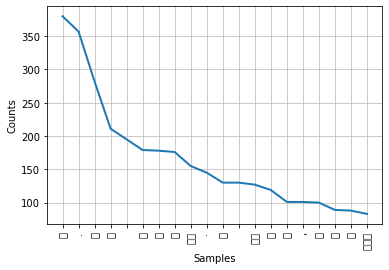

In [18]:
# NLTK 사용시 한글 폰트 사용하기 
# 폰트 미제공시 한글 표시가 안됨 - 아래 그림에서 확인  

# 폰트 size, 기본 폰트 확인  
# rcParams 참조 사이트:  https://matplotlib.org/stable/api/matplotlib_configuration_api.html
#rcParams: 그림 그릴때 기본값으로 가지고 있는 환경변수

print('▶ 설정되어있는 폰트 사이즈 :', plt.rcParams['font.size'] ) 
print('▶ 설정되어있는 폰트 글꼴 : ', plt.rcParams['font.family'])
print ('\n' )

# 그림 그리기 

cons_nltk.plot(20) 

#한글이 깨져서 보임

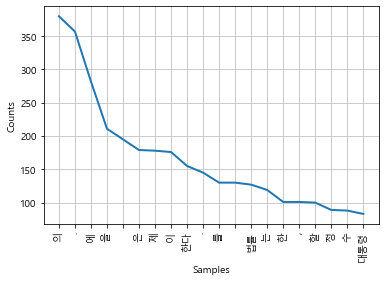

In [22]:
# 필요한 한글 폰트를 불러오기 

from matplotlib import font_manager, rc


font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf", size = 14).get_name() #맑은고딕

rc('font', family=font_name)


cons_nltk.plot(20)


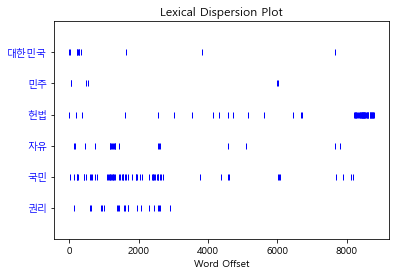

In [23]:
#dispersion_plot 메소드는 단어가 사용된 위치를 시각화함

cons_nltk.dispersion_plot(['대한민국', '민주', '헌법', '자유', '국민', '권리'])



## 한글 워드 클라우드 만들기

일반적으로 1번 과정 ~ 6번 과정으로 이루어짐

1. 데이터 불러오기
2. 형태소 분석
3. 명사만 불러오기
4. 두 음절 이상 단어만 추출하기
5. 최빈 단어 확인하기
6. wordCloud 그리기

### 데이터 불러오기

In [24]:

from collections import Counter


# 해당 화일 불러오기 

f = open('인공지능의 진화방향.txt', 'r', encoding='utf-8')


lists = f.readlines()  

f.close()

# print(lists)

lists


['인공지능은 최근 5년간 매우 빠른 속도로 진화하고 있다. 과거 이론에 머물거나 제한된 기능만을 수행했던 인공지능은 이제 실제 구현을 통해 그 성능을 증명해내고 다양한 현실 세계의 문제에 하나씩 적용되기 시작했다. 2010년을 전후해 혁신적으로 발전한 알고리즘, 컴퓨팅, 빅데이터 기술이 서로 융복합되며 이런 성과를 이루어 내고 있다. 인공지능 분야의 혁신적인 논문, 이러한 논문들을 실제 구현 가능하게 하는 컴퓨팅 인프라(클라우드 및 GPU), 인공지능을 학습 시킬 수 있는 충분한 데이터가 확보되면서 이론에서 현실로 잘 나오지 못했던 인공지능이 우리의 곁으로 다가오게 된 것이다.\n',
 '빠르게 발전하고 있는 인공지능은 이제 여러 분야에서 사람의 능력을 넘어서는 수준으로 구현되고 있다. 광범위한 분야에 걸쳐 인간처럼 외부의 정보를 인식하고, 학습하며, 추론하고, 행동하는 인공지능에 대한 연구가 활발히 진행되고 있다. 특히 시각, 청각지능 분야의 발전으로 인해 인공지능은 이제 사람 보다 더 높은 정확도로 사물을 인식할 수 있고, 사람과 비슷한 수준으로 언어를 이해할 수도 있게 되었다. 이러한 인식분야의 발전으로 인공지능은 이제 외부의 수 많은 데이터를 스스로 인식하고 이해해 지식화할 수 있는 ‘정보’로 받아드릴 수 있게 되었다. 그 동안 축적되어 온 엄청난 빅데이터를 기계가 스스로 학습할 수 있게 되면서 인공지능의 지능이 혁신적으로 발전하고 있는 것이다.\n',
 '특히 최근 2년 간은 강화학습 및 관계형 추론, 예측 기반의 행동 분야 연구가 활발히 진행되며 인공지능이 인간의 사고 영역에 한걸음 더 다가 섰다. 알파고의 핵심 기술 중 하나인 강화학습(Reinforcement Learning)에 대한 연구가 2016년 이후 빠르게 발전하고 있다. 강화학습 분야의 발달로 인해 인공지능은 이제 목적 달성을 위한 방법을 시행착오를 통해 스스로 깨우치며 알아간다. 수 십만 번 이상의 반복 학습을 통해 터득하게 된 인공지능의 방법은 때로는 사람들이 전혀 생각해 내지 못했

In [25]:

# 읽어 들인 화일의 데이터 타입을 확인 

type(lists)


list

### 형태소 분석

In [26]:
# sentences_tag 리스트에 단어와 품사태깅 튜플 리스트 만들기 

sentences_tag = []   # 초기화 

for sentence in lists:
    word_tag = okt.pos(sentence)   # 품사 태깅 (단어 + 품사) #간단하게 하기 위해서 okt사용.
    sentences_tag.append(word_tag)

print(sentences_tag)


[[('인공', 'Noun'), ('지능', 'Noun'), ('은', 'Josa'), ('최근', 'Noun'), ('5년', 'Number'), ('간', 'Foreign'), ('매우', 'Noun'), ('빠른', 'Adjective'), ('속도', 'Noun'), ('로', 'Josa'), ('진화', 'Noun'), ('하고', 'Josa'), ('있다', 'Adjective'), ('.', 'Punctuation'), ('과거', 'Noun'), ('이론', 'Noun'), ('에', 'Josa'), ('머물거나', 'Verb'), ('제한', 'Noun'), ('된', 'Verb'), ('기능', 'Noun'), ('만을', 'Josa'), ('수행', 'Noun'), ('했던', 'Verb'), ('인공', 'Noun'), ('지능', 'Noun'), ('은', 'Josa'), ('이제', 'Noun'), ('실제', 'Noun'), ('구현', 'Noun'), ('을', 'Josa'), ('통해', 'Noun'), ('그', 'Noun'), ('성능', 'Noun'), ('을', 'Josa'), ('증명', 'Noun'), ('해내고', 'Verb'), ('다양한', 'Adjective'), ('현실', 'Noun'), ('세계', 'Noun'), ('의', 'Josa'), ('문제', 'Noun'), ('에', 'Josa'), ('하나', 'Noun'), ('씩', 'Suffix'), ('적용', 'Noun'), ('되기', 'Verb'), ('시작', 'Noun'), ('했다', 'Verb'), ('.', 'Punctuation'), ('2010년', 'Number'), ('을', 'Foreign'), ('전후', 'Noun'), ('해', 'Verb'), ('혁신', 'Noun'), ('적', 'Suffix'), ('으로', 'Josa'), ('발전', 'Noun'), ('한', 'Josa'), ('알고리즘', 'Noun'), (','

### 명사만 불러오기

In [27]:
# sentences_tag 리스트에서 명사만 추출

noun_list = []    # 명사 리스트를 준비 

for sentence in sentences_tag:
    for word, tag in sentence:
        if tag in ['Noun']:             # if tag == 'Noun' :   와 동일    
            noun_list.append(word)
  
print(len(noun_list))
print()

print(noun_list)


549

['인공', '지능', '최근', '매우', '속도', '진화', '과거', '이론', '제한', '기능', '수행', '인공', '지능', '이제', '실제', '구현', '통해', '그', '성능', '증명', '현실', '세계', '문제', '하나', '적용', '시작', '전후', '혁신', '발전', '알고리즘', '컴퓨팅', '빅데이터', '기술', '서로', '융', '복합', '성과', '인공', '지능', '분야', '혁신', '논문', '논문', '실제', '구현', '컴퓨팅', '인프라', '클라우드', '및', '인공', '지능', '학습', '수', '데이터', '확보', '이론', '현실', '인공', '지능', '우리', '곁', '것', '발전', '인공', '지능', '이제', '여러', '분야', '사람', '능력', '수준', '구현', '분야', '인간', '외부', '정보', '인식', '학습', '추론', '행동', '인공', '지능', '대한', '연구', '진행', '시각', '청각', '지능', '분야', '발전', '인공', '지능', '이제', '사람', '더', '정확도', '사물', '인식', '수', '사람과', '수준', '언어', '이해', '수도', '인식', '분야', '발전', '인공', '지능', '이제', '외부', '수', '데이터', '스스로', '인식', '이해해', '지식', '수', '정보', '로', '드릴', '수', '그', '동안', '축적', '온', '빅데이터', '기계', '스스로', '학습', '수', '인공', '지능', '지능', '혁신', '발전', '것', '최근', '간', '강화', '학습', '및', '관계', '추론', '예측', '기반', '행동', '분야', '연구', '진행', '인공', '지능', '인간', '사고', '영역', '걸음', '더', '다가', '알파', '고의', '핵심', '기술', '중', '하나', '강화', '학습', 

### 두 음절 이상 단어만 추출하기

In [29]:
# 한 음절 단어는 제외 


noun_list = [word for word in noun_list if len(word) > 1]

print(noun_list[:50])


['인공', '지능', '최근', '매우', '속도', '진화', '과거', '이론', '제한', '기능', '수행', '인공', '지능', '이제', '실제', '구현', '통해', '성능', '증명', '현실', '세계', '문제', '하나', '적용', '시작', '전후', '혁신', '발전', '알고리즘', '컴퓨팅', '빅데이터', '기술', '서로', '복합', '성과', '인공', '지능', '분야', '혁신', '논문', '논문', '실제', '구현', '컴퓨팅', '인프라', '클라우드', '인공', '지능', '학습', '데이터']


### 최빈 단어 확인하기

In [31]:

counts = Counter(noun_list)

words = counts.most_common(30)    # 최빈 단어 30개를 추출 

print(words) #값을 받고, 자기 나름대로 통제해서 이쁘게 보여줌. words는 쥬피터가 보여주는 것.
print()

print(dict(words))  # wordcloude의 generate_from_frequencies 메소드의 입력은 항상 dict 타입이어야 된다.


[('지능', 36), ('인공', 29), ('구현', 14), ('분야', 13), ('학습', 13), ('연구', 13), ('인간', 11), ('발전', 9), ('행동', 9), ('데이터', 7), ('추론', 7), ('이제', 6), ('정보', 6), ('기업', 6), ('현실', 5), ('인식', 5), ('강화', 5), ('기반', 5), ('최근', 4), ('통해', 4), ('시작', 4), ('혁신', 4), ('컴퓨팅', 4), ('논문', 4), ('수준', 4), ('진행', 4), ('예측', 4), ('환경', 4), ('노력', 4), ('사람', 3)]

{'지능': 36, '인공': 29, '구현': 14, '분야': 13, '학습': 13, '연구': 13, '인간': 11, '발전': 9, '행동': 9, '데이터': 7, '추론': 7, '이제': 6, '정보': 6, '기업': 6, '현실': 5, '인식': 5, '강화': 5, '기반': 5, '최근': 4, '통해': 4, '시작': 4, '혁신': 4, '컴퓨팅': 4, '논문': 4, '수준': 4, '진행': 4, '예측': 4, '환경': 4, '노력': 4, '사람': 3}


### WordCloud 그리기

한글은 폰트도 지정해 줘야함.

{'지능': 36, '인공': 29, '구현': 14, '분야': 13, '학습': 13, '연구': 13, '인간': 11, '발전': 9, '행동': 9, '데이터': 7, '추론': 7, '이제': 6, '정보': 6, '기업': 6, '현실': 5, '인식': 5, '강화': 5, '기반': 5, '최근': 4, '통해': 4, '시작': 4, '혁신': 4, '컴퓨팅': 4, '논문': 4, '수준': 4, '진행': 4, '예측': 4, '환경': 4, '노력': 4, '사람': 3}




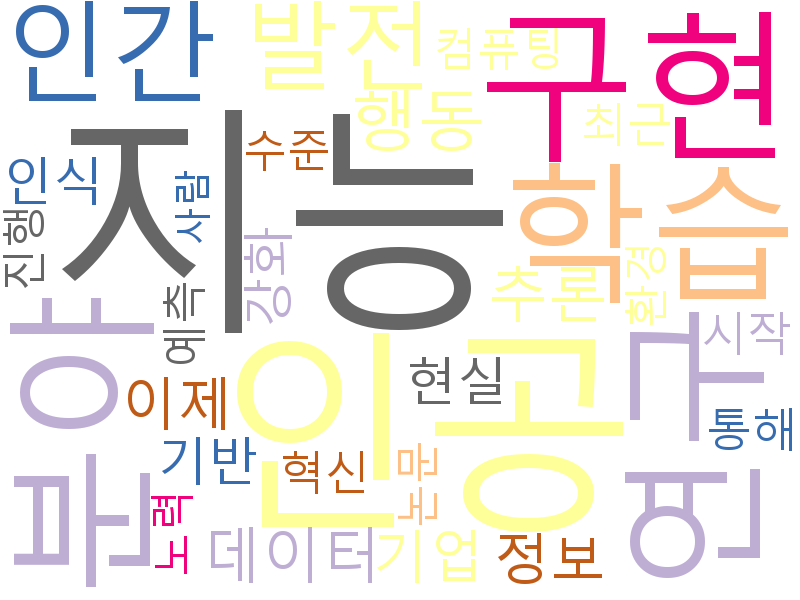

In [32]:
# 필요한 패키지 불러오기

from wordcloud import WordCloud


wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                      background_color='white',
                      colormap = 'Accent_r',
                      width=800,
                      height=600)

print(dict(words))
print('\n')

cloud = wordcloud.generate_from_frequencies(dict(words))

wordcloud.to_image()


{'지능': 36, '인공': 29, '구현': 14, '분야': 13, '학습': 13, '연구': 13, '인간': 11, '발전': 9, '행동': 9, '데이터': 7, '추론': 7, '이제': 6, '정보': 6, '기업': 6, '현실': 5, '인식': 5, '강화': 5, '기반': 5, '최근': 4, '통해': 4, '시작': 4, '혁신': 4, '컴퓨팅': 4, '논문': 4, '수준': 4, '진행': 4, '예측': 4, '환경': 4, '노력': 4, '사람': 3}




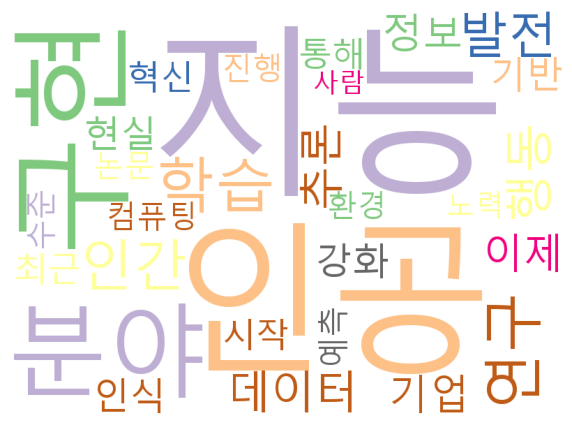

In [34]:
#word cloud 객체 만들기

wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                      background_color='white',
                      colormap = 'Accent_r',
                      width=800,
                      height=600)

print(dict(words))
print('\n')

cloud = wordcloud.generate_from_frequencies(dict(words))  # 여기까지 위에서 복사후 붙여넣기
                                                          # 이제부터 이런 방식으로 사용

fig = plt.figure(figsize=(10, 8))    #  가상의 도화지를 정의하고 크기를 지정해 줌

plt.axis('off')                  # x, y축 선을 그리지 않게 세팅

plt.imshow(cloud)                # 가상의 도화지에 cloud 그림을 그림

plt.show()                       # 가상의 그림을 화면에 출력 

fig.savefig('worldcloud.png')    # 워드 클라우드를 화일로 저장



## Color Map 참조 사이트 
#### - https://matplotlib.org/stable/tutorials/colors/colormaps.html   


In [35]:
# pyplot 클래스의 colormaps() 메소드를 사용해서 Matplotlib에서 사용할 수 있는 모든 컬러맵의 이름을 얻을 수 있음
# Accent_r 은 Accent 칼라맵의 reverse type 을 말함 

cmaps = plt.colormaps()

for cm in cmaps:
    print(cm)


Accent
Accent_r
Blues
Blues_r
BrBG
BrBG_r
BuGn
BuGn_r
BuPu
BuPu_r
CMRmap
CMRmap_r
Dark2
Dark2_r
GnBu
GnBu_r
Greens
Greens_r
Greys
Greys_r
OrRd
OrRd_r
Oranges
Oranges_r
PRGn
PRGn_r
Paired
Paired_r
Pastel1
Pastel1_r
Pastel2
Pastel2_r
PiYG
PiYG_r
PuBu
PuBuGn
PuBuGn_r
PuBu_r
PuOr
PuOr_r
PuRd
PuRd_r
Purples
Purples_r
RdBu
RdBu_r
RdGy
RdGy_r
RdPu
RdPu_r
RdYlBu
RdYlBu_r
RdYlGn
RdYlGn_r
Reds
Reds_r
Set1
Set1_r
Set2
Set2_r
Set3
Set3_r
Spectral
Spectral_r
Wistia
Wistia_r
YlGn
YlGnBu
YlGnBu_r
YlGn_r
YlOrBr
YlOrBr_r
YlOrRd
YlOrRd_r
afmhot
afmhot_r
autumn
autumn_r
binary
binary_r
bone
bone_r
brg
brg_r
bwr
bwr_r
cividis
cividis_r
cool
cool_r
coolwarm
coolwarm_r
copper
copper_r
cubehelix
cubehelix_r
flag
flag_r
gist_earth
gist_earth_r
gist_gray
gist_gray_r
gist_heat
gist_heat_r
gist_ncar
gist_ncar_r
gist_rainbow
gist_rainbow_r
gist_stern
gist_stern_r
gist_yarg
gist_yarg_r
gnuplot
gnuplot2
gnuplot2_r
gnuplot_r
gray
gray_r
hot
hot_r
hsv
hsv_r
inferno
inferno_r
jet
jet_r
magma
magma_r
nipy_spectral
nipy

## 수고하셨습니다.  😀